In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
pd.set_option('display.max_columns', None)

In [206]:
nutr = pd.read_csv('E:\\data_science\\datasets\\Nutritions_US.csv', encoding= 'ISO-8859-1')

In [207]:
nutr.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [208]:
nutr = nutr.drop(columns=['NDB_No', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2'])

In [209]:
nutr = nutr.rename(columns={'Shrt_Desc': 'name'})

In [210]:
nutr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8790 non-null   object 
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [211]:
nutr['Energ_Kcal'] = nutr['Energ_Kcal'].astype('float')

In [212]:
nutr.head()

,name,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
0,"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718.0,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0
2,"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0
3,"CHEESE,BLUE",42.41,353.0,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0
4,"CHEESE,BRICK",41.11,371.0,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0


In [213]:
nutr = nutr.set_index('name')

In [214]:
nutr.isna().sum()

Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(¾g)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(¾g)      1261
Folic_Acid_(¾g)      2039
Food_Folate_(¾g)     1768
Folate_DFE_(¾g)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(¾g)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(¾g)         1806
Alpha_Carot_(¾g)     3258
Beta_Carot_(¾g)      3162
Beta_Crypt_(¾g)      3270
Lycopene_(¾g)        3292
Lut+Zea_ (¾g)        3315
Vit_E_(mg)  

### Filling Null values with '0'
Dataset contains nutrition information, hence null values can be filled with '0'.

In [215]:
nutr = nutr.fillna(0)

In [216]:
nutr.isna().sum()

Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(¾g)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(¾g)      0
Folic_Acid_(¾g)      0
Food_Folate_(¾g)     0
Folate_DFE_(¾g)      0
Choline_Tot_ (mg)    0
Vit_B12_(¾g)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(¾g)         0
Alpha_Carot_(¾g)     0
Beta_Carot_(¾g)      0
Beta_Crypt_(¾g)      0
Lycopene_(¾g)        0
Lut+Zea_ (¾g)        0
Vit_E_(mg)           0
Vit_D_¾g             0
Vit_D_IU             0
Vit_K_(¾g)           0
FA_Sat_(g)           0
FA_Mono_(g)

### Function for finding outliers

In [217]:
nutr.agg(['mean', 'median', 'std', 'skew'])

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
mean,54.106061,226.317634,11.342849,10.553725,1.717527,22.127710,2.039625,6.762531,73.700114,2.655447,32.328555,154.264164,265.928328,309.545165,1.947369,0.167958,0.496425,12.575688,8.372082,0.207039,0.234561,3.392651,0.484946,0.261515,44.196018,17.794539,19.616951,49.234243,23.677861,1.203482,676.292947,92.215358,71.325825,19.822639,141.701706,6.671672,98.225711,120.817520,0.893890,0.364300,14.591809,9.295370,3.434338,3.771797,2.115612,38.718885
median,63.080000,191.000000,8.000000,5.140000,1.170000,9.340000,0.400000,0.490000,19.000000,1.325000,20.000000,130.000000,220.000000,86.000000,0.800000,0.077000,0.022000,4.000000,0.000000,0.077000,0.151000,2.110000,0.275000,0.119000,9.000000,0.000000,6.000000,7.000000,1.650000,0.070000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,1.435500,1.600000,0.591500,2.000000
std,30.776516,169.877539,10.530474,15.814842,2.967679,27.270822,4.267904,13.723474,200.017998,5.651177,55.816105,202.043448,371.155815,939.452380,3.346134,0.543675,6.301566,28.050321,65.627097,0.507800,0.438182,4.741533,1.252370,0.467871,127.710553,100.830553,56.621574,183.509279,51.328654,4.271949,3694.534015,771.478769,761.415298,255.207074,1030.697731,123.181752,1107.608225,911.174861,3.853351,3.091688,123.670680,62.125274,6.426162,6.825884,5.050857,117.353035
skew,-0.570596,1.148610,1.166368,3.309724,17.017930,1.127598,5.811426,2.904892,13.432410,6.962327,5.672014,18.530683,15.590756,22.513287,9.593906,16.362549,40.433711,38.441668,29.549434,18.149933,11.772537,6.514825,14.853265,7.681621,8.944269,10.927219,13.045058,10.546925,15.672419,13.212239,15.456607,24.355932,25.313237,29.098417,19.196363,38.667063,24.246488,13.356796,13.700820,61.111488,61.105802,16.293227,6.664663,4.687548,6.357650,15.322793


In [218]:
def outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outliers = df[((df<(df-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return outliers

### Categorizing Dataset

**1.Macronutrients**

In [219]:
nutr.columns

Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)',
       'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
       'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)',
       'Selenium_(¾g)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
       'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(¾g)',
       'Folic_Acid_(¾g)', 'Food_Folate_(¾g)', 'Folate_DFE_(¾g)',
       'Choline_Tot_ (mg)', 'Vit_B12_(¾g)', 'Vit_A_IU', 'Vit_A_RAE',
       'Retinol_(¾g)', 'Alpha_Carot_(¾g)', 'Beta_Carot_(¾g)',
       'Beta_Crypt_(¾g)', 'Lycopene_(¾g)', 'Lut+Zea_ (¾g)', 'Vit_E_(mg)',
       'Vit_D_¾g', 'Vit_D_IU', 'Vit_K_(¾g)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)'],
      dtype='object')

In [220]:
macr_nutr = nutr[['Water_(g)','Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)']]

In [221]:
macr_nutr.head()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
name,,,,,,,,,,,
"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,0.06,0.0,0.06,51.368,21.021,3.043,215.0
"BUTTER,WHIPPED,W/ SALT",16.72,718.0,0.49,78.30,2.87,0.0,0.06,45.390,19.874,3.331,225.0
"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.0,0.00,61.924,28.732,3.694,256.0
"CHEESE,BLUE",42.41,353.0,21.40,28.74,2.34,0.0,0.50,18.669,7.778,0.800,75.0
"CHEESE,BRICK",41.11,371.0,23.24,29.68,2.79,0.0,0.51,18.764,8.598,0.784,94.0


In [222]:
#Converting milligrams (mg) to grams (g)
macr_nutr['Cholestrl_(g)'] = (macr_nutr['Cholestrl_(mg)'])/1000

C:\Users\Sajid\AppData\Local\Temp\ipykernel_16436\876238908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macr_nutr['Cholestrl_(g)'] = (macr_nutr['Cholestrl_(mg)'])/1000


In [223]:
macr_nutr = macr_nutr.drop(columns='Cholestrl_(mg)')

In [224]:
macr_nutr

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(g)
name,,,,,,,,,,,
"BUTTER,WITH SALT",15.87,717.0,0.85,81.11,0.06,0.0,0.06,51.368,21.021,3.043,0.215
"BUTTER,WHIPPED,W/ SALT",16.72,718.0,0.49,78.30,2.87,0.0,0.06,45.390,19.874,3.331,0.225
"BUTTER OIL,ANHYDROUS",0.24,876.0,0.28,99.48,0.00,0.0,0.00,61.924,28.732,3.694,0.256
"CHEESE,BLUE",42.41,353.0,21.40,28.74,2.34,0.0,0.50,18.669,7.778,0.800,0.075
"CHEESE,BRICK",41.11,371.0,23.24,29.68,2.79,0.0,0.51,18.764,8.598,0.784,0.094
...,...,...,...,...,...,...,...,...,...,...,...
"MACKEREL,SALTED",43.00,305.0,18.50,25.10,0.00,0.0,0.00,7.148,8.320,6.210,0.095
"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111.0,20.54,0.84,5.41,0.0,0.00,0.218,0.082,0.222,0.041
"SYRUP,CANE",26.00,269.0,0.00,0.00,73.14,0.0,73.20,0.000,0.000,0.000,0.000


In [225]:
macr_corr = macr_nutr.corr()
macr_corr

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(g)
Water_(g),1.000000,-0.900535,-0.103833,-0.489584,-0.774010,-0.385601,-0.457883,-0.367960,-0.390598,-0.399317,0.055348
Energ_Kcal,-0.900535,1.000000,0.112636,0.806677,0.493028,0.202065,0.315796,0.619119,0.676569,0.595191,0.015090
Protein_(g),-0.103833,0.112636,1.000000,0.062336,-0.304295,-0.074143,-0.269321,0.052530,0.094276,-0.039389,0.290245
Lipid_Tot_(g),-0.489584,0.806677,0.062336,1.000000,-0.048594,-0.023089,-0.000276,0.764603,0.868514,0.703962,0.087229
Carbohydrt_(g),-0.774010,0.493028,-0.304295,-0.048594,1.000000,0.455710,0.617259,-0.043835,-0.096127,0.054849,-0.219735
Fiber_TD_(g),-0.385601,0.202065,-0.074143,-0.023089,0.455710,1.000000,0.107561,-0.075663,-0.030789,0.073603,-0.145824
Sugar_Tot_(g),-0.457883,0.315796,-0.269321,-0.000276,0.617259,0.107561,1.000000,0.068650,-0.063346,-0.005232,-0.136263
FA_Sat_(g),-0.367960,0.619119,0.052530,0.764603,-0.043835,-0.075663,0.068650,1.000000,0.520224,0.267313,0.091231
FA_Mono_(g),-0.390598,0.676569,0.094276,0.868514,-0.096127,-0.030789,-0.063346,0.520224,1.000000,0.573848,0.081176
FA_Poly_(g),-0.399317,0.595191,-0.039389,0.703962,0.054849,0.073603,-0.005232,0.267313,0.573848,1.000000,-0.010235


In [226]:
macr_corr['Energ_Kcal']

Water_(g)        -0.900535
Energ_Kcal        1.000000
Protein_(g)       0.112636
Lipid_Tot_(g)     0.806677
Carbohydrt_(g)    0.493028
Fiber_TD_(g)      0.202065
Sugar_Tot_(g)     0.315796
FA_Sat_(g)        0.619119
FA_Mono_(g)       0.676569
FA_Poly_(g)       0.595191
Cholestrl_(g)     0.015090
Name: Energ_Kcal, dtype: float64

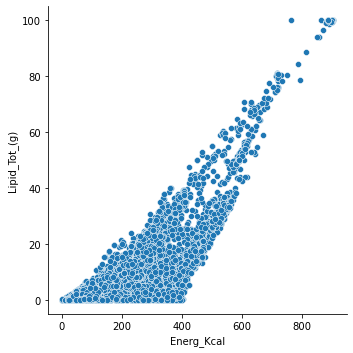

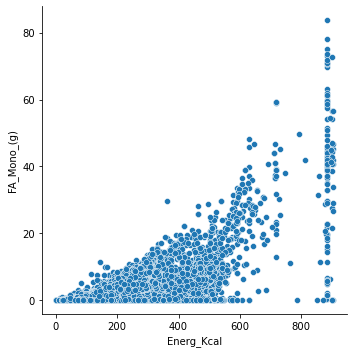

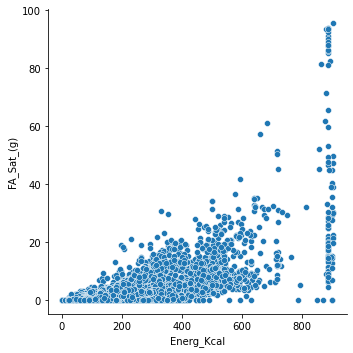

In [227]:
sns.relplot(data=macr_nutr, x='Energ_Kcal', y='Lipid_Tot_(g)')
sns.relplot(data=macr_nutr, x='Energ_Kcal', y='FA_Mono_(g)')
sns.relplot(data=macr_nutr, x='Energ_Kcal', y='FA_Sat_(g)')
plt.show()

<AxesSubplot:>

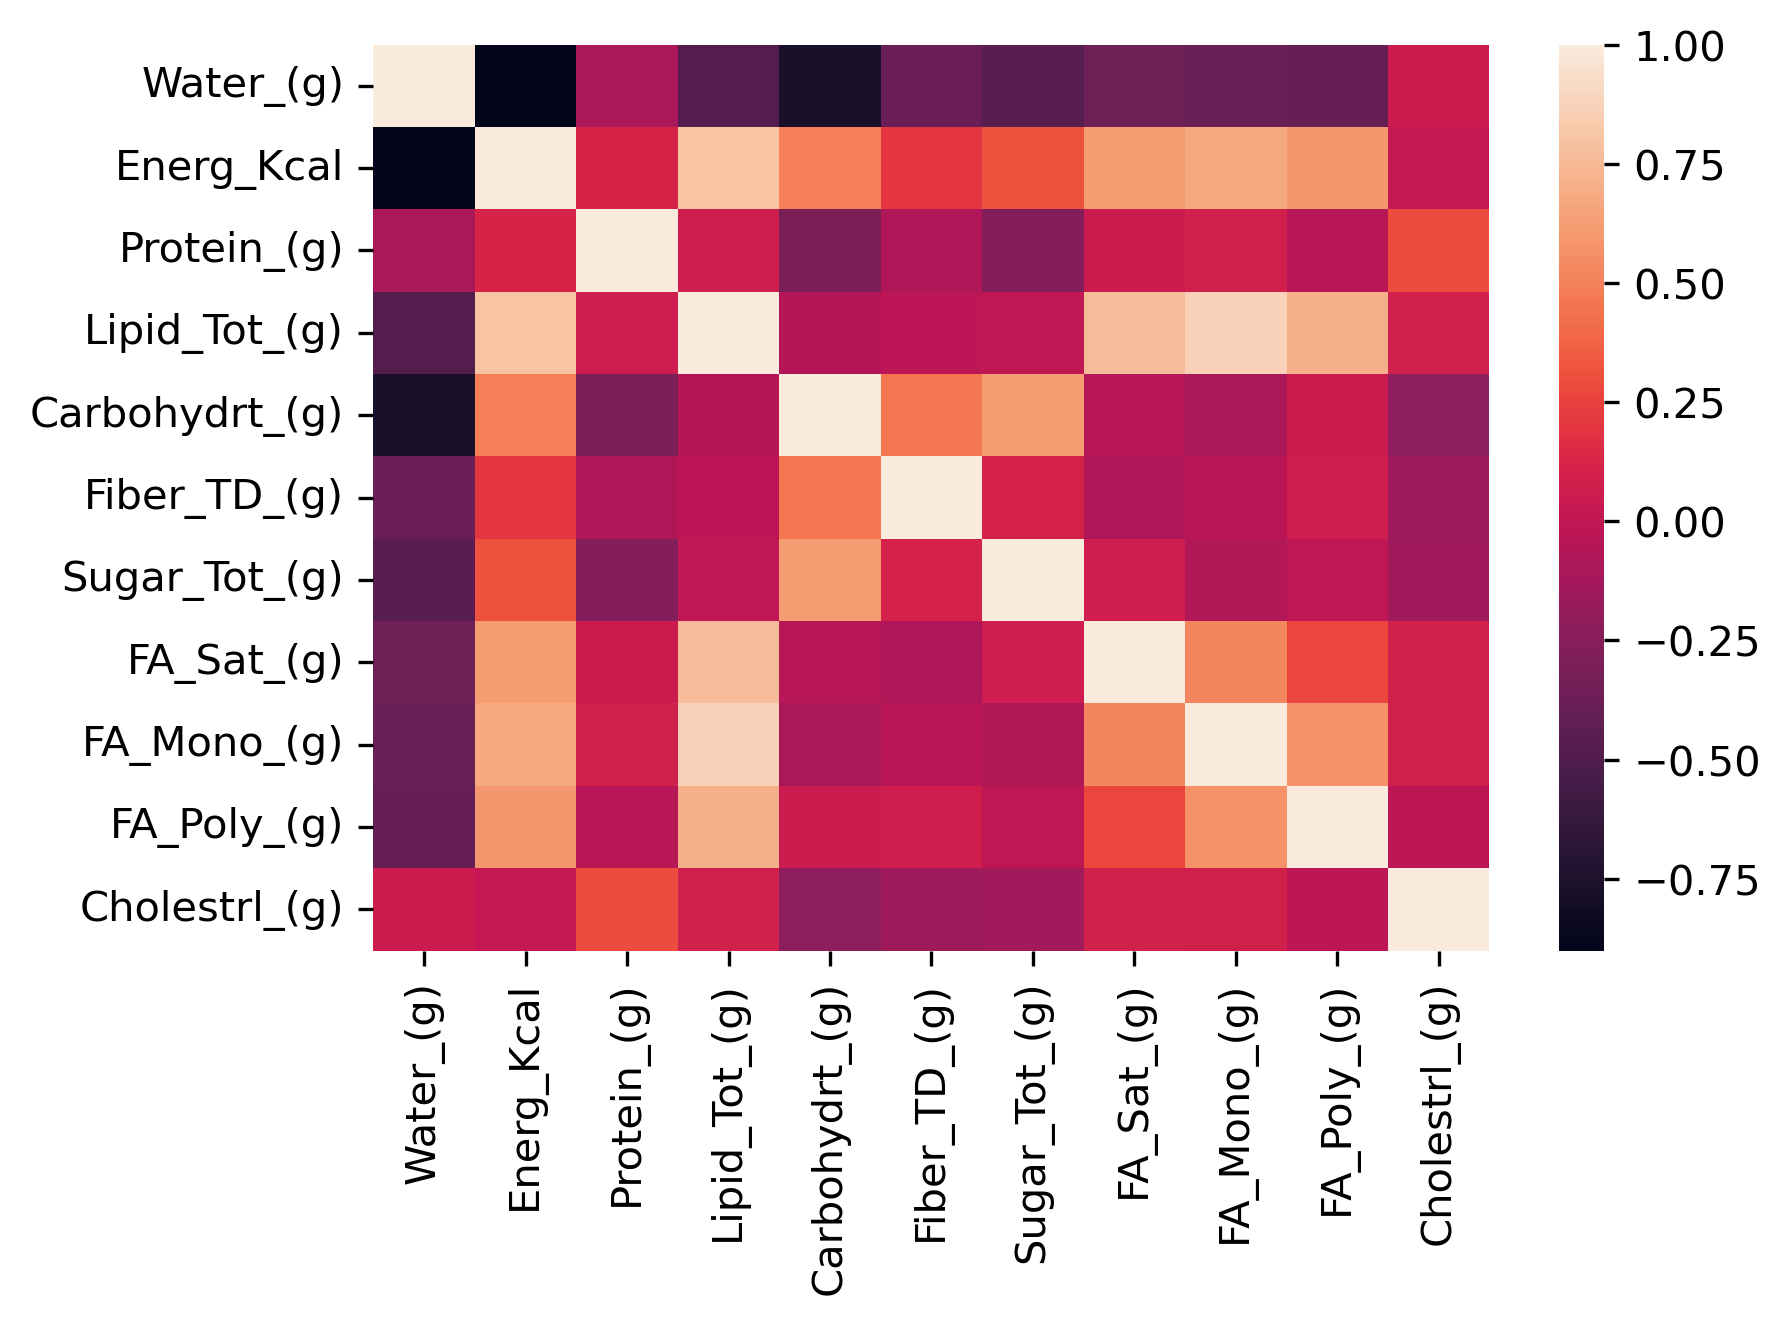

In [228]:
plt.figure(dpi=300)
sns.heatmap(macr_corr)

In [229]:
outlier(macr_nutr)

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(g)
name,,,,,,,,,,,
"BUTTER,WITH SALT",NaN,717.0,NaN,81.11,NaN,NaN,NaN,51.368,21.021,NaN,0.215
"BUTTER,WHIPPED,W/ SALT",NaN,718.0,NaN,78.30,NaN,NaN,NaN,45.390,19.874,NaN,0.225
"BUTTER OIL,ANHYDROUS",NaN,876.0,NaN,99.48,NaN,NaN,NaN,61.924,28.732,NaN,0.256
"CHEESE,BLUE",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.669,NaN,NaN,NaN
"CHEESE,BRICK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.764,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
"MACKEREL,SALTED",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.21,NaN
"SCALLOP,(BAY&SEA),CKD,STMD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SYRUP,CANE",NaN,NaN,NaN,NaN,NaN,NaN,73.2,NaN,NaN,NaN,NaN


**2.Micronutrients**

In [230]:
nutr.columns

Index(['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)',
       'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)',
       'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
       'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)',
       'Selenium_(¾g)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
       'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(¾g)',
       'Folic_Acid_(¾g)', 'Food_Folate_(¾g)', 'Folate_DFE_(¾g)',
       'Choline_Tot_ (mg)', 'Vit_B12_(¾g)', 'Vit_A_IU', 'Vit_A_RAE',
       'Retinol_(¾g)', 'Alpha_Carot_(¾g)', 'Beta_Carot_(¾g)',
       'Beta_Crypt_(¾g)', 'Lycopene_(¾g)', 'Lut+Zea_ (¾g)', 'Vit_E_(mg)',
       'Vit_D_¾g', 'Vit_D_IU', 'Vit_K_(¾g)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)'],
      dtype='object')

In [231]:
micr_nutr = nutr[['Energ_Kcal','Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)',
       'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Choline_Tot_ (mg)',
       'Vit_E_(mg)','Selenium_(¾g)', 'Folate_Tot_(¾g)', 'Folic_Acid_(¾g)',
       'Food_Folate_(¾g)', 'Folate_DFE_(¾g)', 'Vit_B12_(¾g)', 'Retinol_(¾g)',
       'Alpha_Carot_(¾g)', 'Beta_Carot_(¾g)', 'Beta_Crypt_(¾g)',
       'Lycopene_(¾g)', 'Lut+Zea_ (¾g)', 'Vit_D_¾g', 'Vit_K_(¾g)']]

In [232]:
micr_nutr

,Energ_Kcal,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Choline_Tot_ (mg),Vit_E_(mg),Selenium_(¾g),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Vit_B12_(¾g),Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_D_¾g,Vit_K_(¾g)
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"BUTTER,WITH SALT",717.0,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,0.0,0.005,0.034,0.042,0.110,0.003,18.8,2.32,1.0,3.0,0.0,3.0,3.0,0.17,671.0,0.0,158.0,0.0,0.0,0.0,0.0,7.0
"BUTTER,WHIPPED,W/ SALT",718.0,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.007,0.064,0.022,0.097,0.008,18.8,1.37,0.0,4.0,0.0,4.0,4.0,0.07,671.0,1.0,135.0,6.0,0.0,13.0,0.0,4.6
"BUTTER OIL,ANHYDROUS",876.0,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.001,0.005,0.003,0.010,0.001,22.3,2.80,0.0,0.0,0.0,0.0,0.0,0.01,824.0,0.0,193.0,0.0,0.0,0.0,0.0,8.6
"CHEESE,BLUE",353.0,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,0.0,0.029,0.382,1.016,1.729,0.166,15.4,0.25,14.5,36.0,0.0,36.0,36.0,1.22,192.0,0.0,74.0,0.0,0.0,0.0,0.5,2.4
"CHEESE,BRICK",371.0,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,0.0,0.014,0.351,0.118,0.288,0.065,15.4,0.26,14.5,20.0,0.0,20.0,20.0,1.26,286.0,0.0,76.0,0.0,0.0,0.0,0.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"MACKEREL,SALTED",305.0,66.0,1.40,60.0,254.0,520.0,4450.0,1.10,0.100,0.000,0.0,0.020,0.190,3.300,0.000,0.410,101.6,2.38,73.4,15.0,0.0,15.0,15.0,12.00,47.0,0.0,0.0,0.0,0.0,0.0,25.2,7.8
"SCALLOP,(BAY&SEA),CKD,STMD",111.0,10.0,0.58,37.0,426.0,314.0,667.0,1.55,0.033,0.029,0.0,0.012,0.024,1.076,0.366,0.112,110.7,0.00,21.7,20.0,0.0,20.0,20.0,2.15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"SYRUP,CANE",269.0,13.0,3.60,10.0,8.0,63.0,58.0,0.19,0.020,0.000,0.0,0.130,0.060,0.100,0.000,0.000,0.0,0.00,0.7,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
#Converting ¾g to mg

micr_nutr[['Selenium_(¾g)', 'Folate_Tot_(¾g)', 'Folic_Acid_(¾g)',
       'Food_Folate_(¾g)', 'Folate_DFE_(¾g)', 'Vit_B12_(¾g)', 'Retinol_(¾g)',
       'Alpha_Carot_(¾g)', 'Beta_Carot_(¾g)', 'Beta_Crypt_(¾g)',
       'Lycopene_(¾g)', 'Lut+Zea_ (¾g)', 'Vit_D_¾g', 'Vit_K_(¾g)']] = micr_nutr[['Selenium_(¾g)', 'Folate_Tot_(¾g)', 'Folic_Acid_(¾g)',
       'Food_Folate_(¾g)', 'Folate_DFE_(¾g)', 'Vit_B12_(¾g)', 'Retinol_(¾g)',
       'Alpha_Carot_(¾g)', 'Beta_Carot_(¾g)', 'Beta_Crypt_(¾g)',
       'Lycopene_(¾g)', 'Lut+Zea_ (¾g)', 'Vit_D_¾g', 'Vit_K_(¾g)']]*750

C:\Users\Sajid\AppData\Local\Temp\ipykernel_16436\1436433699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  micr_nutr[['Selenium_(¾g)', 'Folate_Tot_(¾g)', 'Folic_Acid_(¾g)',


In [234]:
micr_nutr

,Energ_Kcal,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Choline_Tot_ (mg),Vit_E_(mg),Selenium_(¾g),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Vit_B12_(¾g),Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_D_¾g,Vit_K_(¾g)
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"BUTTER,WITH SALT",717.0,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,0.0,0.005,0.034,0.042,0.110,0.003,18.8,2.32,750.0,2250.0,0.0,2250.0,2250.0,127.5,503250.0,0.0,118500.0,0.0,0.0,0.0,0.0,5250.0
"BUTTER,WHIPPED,W/ SALT",718.0,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.007,0.064,0.022,0.097,0.008,18.8,1.37,0.0,3000.0,0.0,3000.0,3000.0,52.5,503250.0,750.0,101250.0,4500.0,0.0,9750.0,0.0,3450.0
"BUTTER OIL,ANHYDROUS",876.0,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.001,0.005,0.003,0.010,0.001,22.3,2.80,0.0,0.0,0.0,0.0,0.0,7.5,618000.0,0.0,144750.0,0.0,0.0,0.0,0.0,6450.0
"CHEESE,BLUE",353.0,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,0.0,0.029,0.382,1.016,1.729,0.166,15.4,0.25,10875.0,27000.0,0.0,27000.0,27000.0,915.0,144000.0,0.0,55500.0,0.0,0.0,0.0,375.0,1800.0
"CHEESE,BRICK",371.0,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,0.0,0.014,0.351,0.118,0.288,0.065,15.4,0.26,10875.0,15000.0,0.0,15000.0,15000.0,945.0,214500.0,0.0,57000.0,0.0,0.0,0.0,375.0,1875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"MACKEREL,SALTED",305.0,66.0,1.40,60.0,254.0,520.0,4450.0,1.10,0.100,0.000,0.0,0.020,0.190,3.300,0.000,0.410,101.6,2.38,55050.0,11250.0,0.0,11250.0,11250.0,9000.0,35250.0,0.0,0.0,0.0,0.0,0.0,18900.0,5850.0
"SCALLOP,(BAY&SEA),CKD,STMD",111.0,10.0,0.58,37.0,426.0,314.0,667.0,1.55,0.033,0.029,0.0,0.012,0.024,1.076,0.366,0.112,110.7,0.00,16275.0,15000.0,0.0,15000.0,15000.0,1612.5,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"SYRUP,CANE",269.0,13.0,3.60,10.0,8.0,63.0,58.0,0.19,0.020,0.000,0.0,0.130,0.060,0.100,0.000,0.000,0.0,0.00,525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
micr_corr = micr_nutr.corr()
micr_corr['Energ_Kcal']

Energ_Kcal           1.000000
Calcium_(mg)         0.124892
Iron_(mg)            0.196225
Magnesium_(mg)       0.262945
Phosphorus_(mg)      0.200714
Potassium_(mg)       0.081643
Sodium_(mg)          0.055920
Zinc_(mg)            0.114401
Copper_mg)           0.102508
Manganese_(mg)       0.037305
Vit_C_(mg)          -0.032983
Thiamin_(mg)         0.186639
Riboflavin_(mg)      0.154218
Niacin_(mg)          0.174282
Panto_Acid_mg)       0.061826
Vit_B6_(mg)          0.119251
Choline_Tot_ (mg)    0.038677
Vit_E_(mg)           0.303858
Selenium_(¾g)        0.057584
Folate_Tot_(¾g)      0.184394
Folic_Acid_(¾g)      0.139003
Food_Folate_(¾g)     0.051113
Folate_DFE_(¾g)      0.143986
Vit_B12_(¾g)        -0.013957
Retinol_(¾g)         0.035004
Alpha_Carot_(¾g)    -0.053661
Beta_Carot_(¾g)     -0.086297
Beta_Crypt_(¾g)     -0.021632
Lycopene_(¾g)       -0.051792
Lut+Zea_ (¾g)       -0.088871
Vit_D_¾g             0.074981
Vit_K_(¾g)          -0.024115
Name: Energ_Kcal, dtype: float64

<AxesSubplot:>

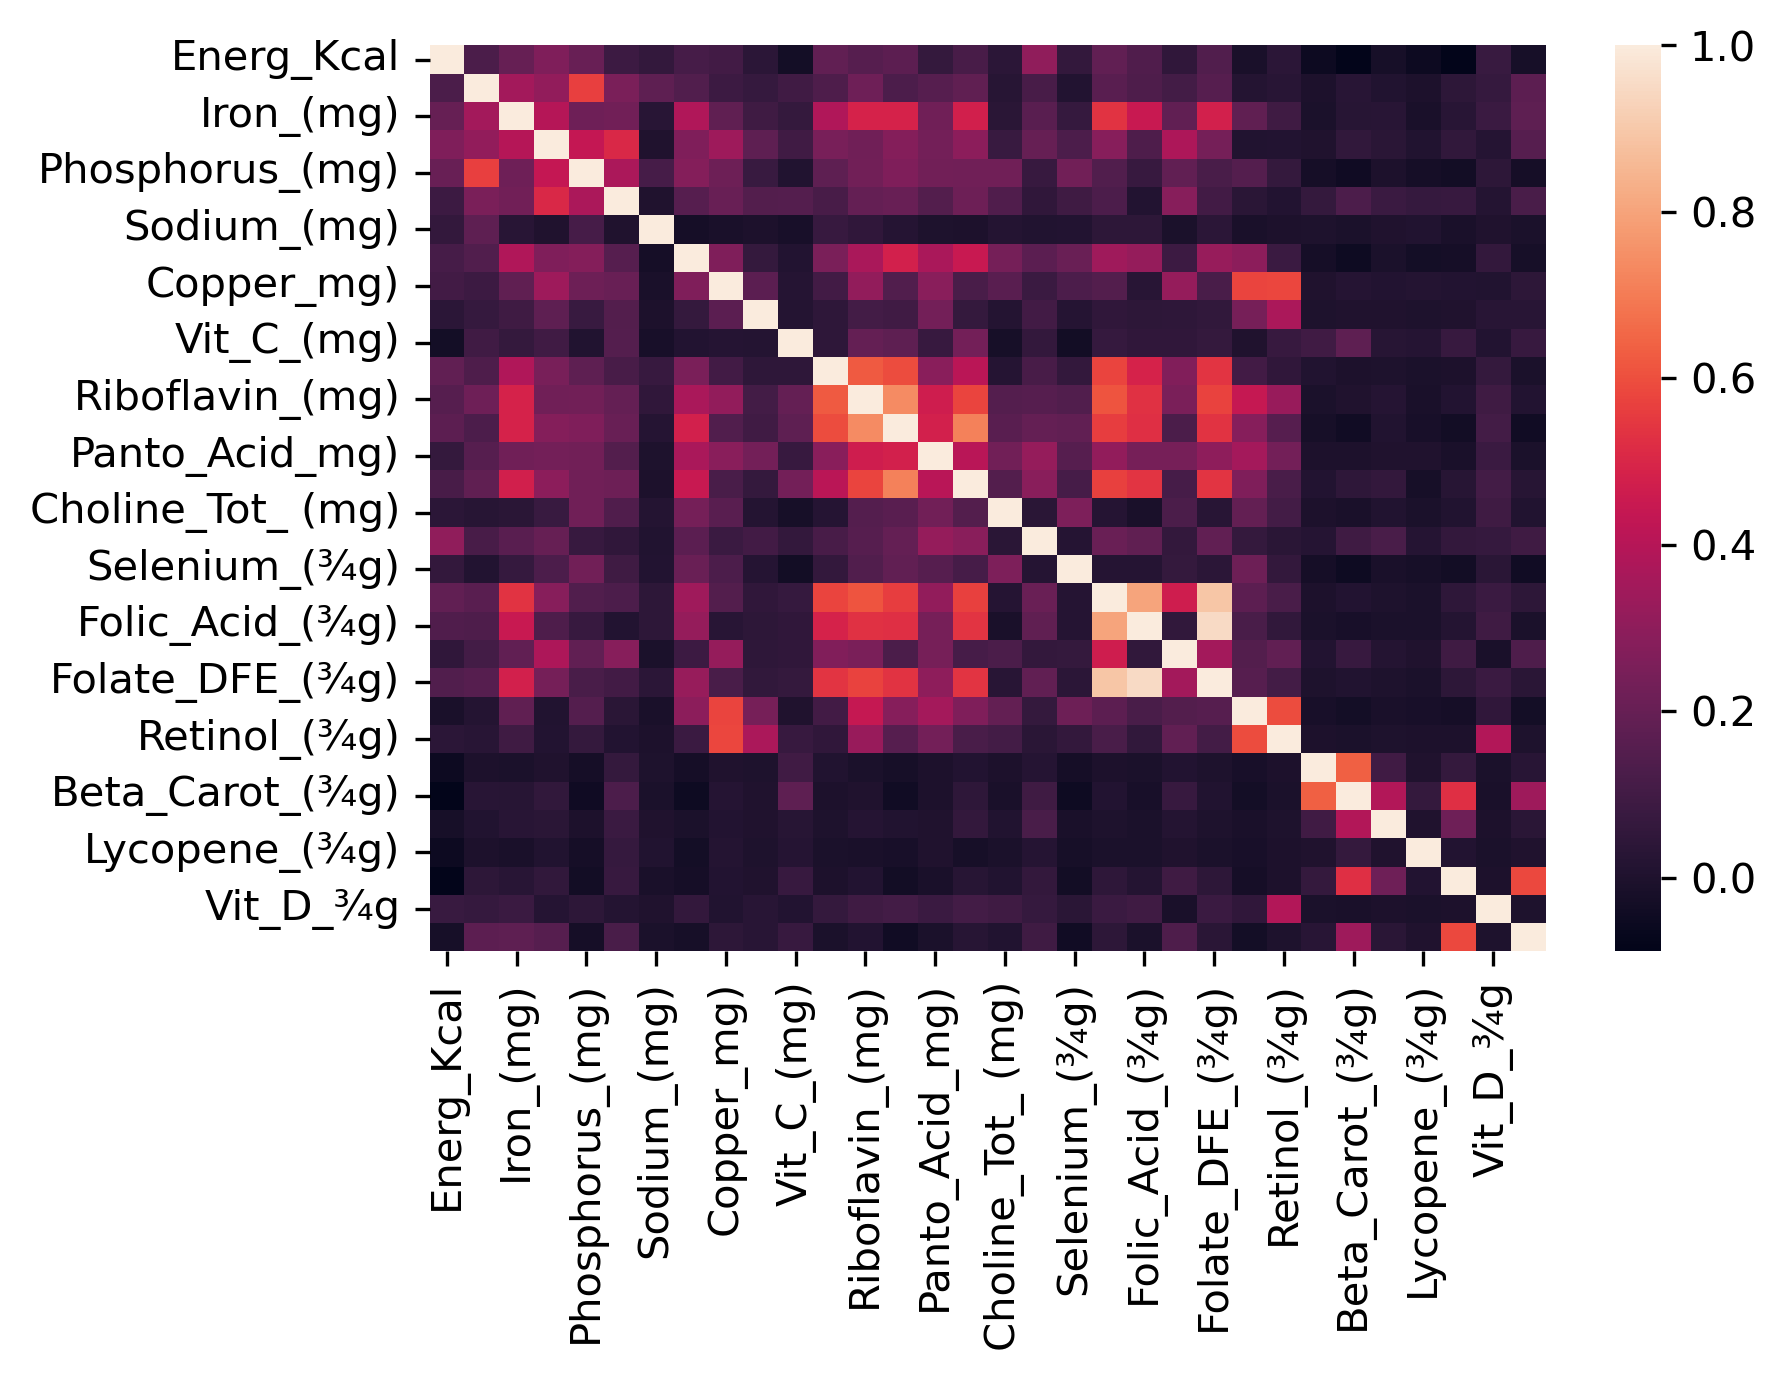

In [236]:
plt.figure(dpi=300)
sns.heatmap(micr_corr)

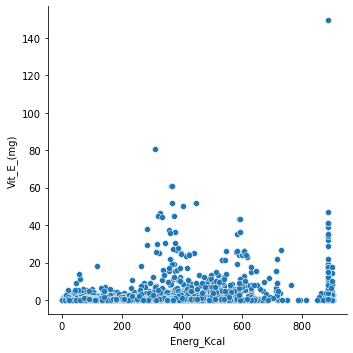

In [237]:
sns.relplot(data=micr_nutr, x='Energ_Kcal', y='Vit_E_(mg)')